# **Analysis of Factors Influencing High-Value Bids in Art Auctions**

### **Objective**
This analysis aims to identify the most significant factors impacting high-value bids in art auctions, focusing on attributes such as critic ratings, acquisition costs, collectors’ price trends, and other key metrics. By understanding these relationships, we seek to provide strategic, data-driven recommendations for enhancing bidder engagement and supporting high-value transactions in the art market.

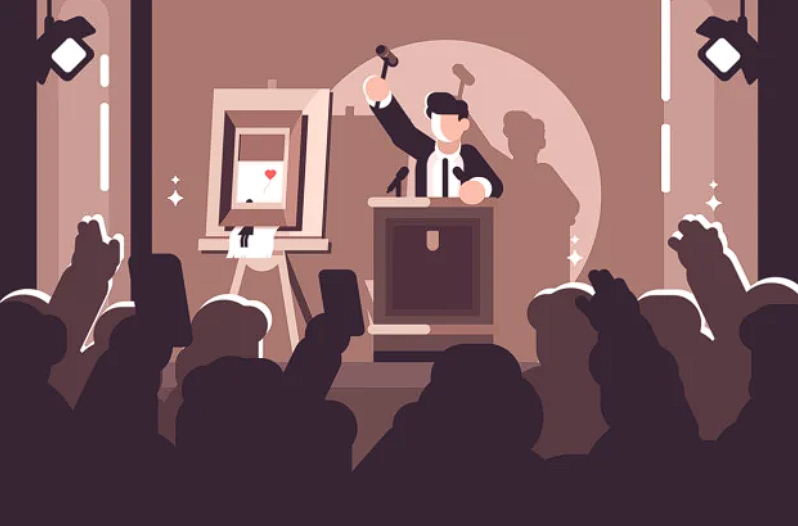

In [18]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [17]:
df = pd.read_excel('Auction.xlsx')

In [21]:
df.head()

,Cid,Art Auction House,IsGood Purchase,Critic Ratings,Buyer No,Zip Code,Art Purchase Date,Year of art piece,Acq Cost,Art Category,...,Brush Size,Brush Finesse,Art Nationality,Top 3 artists,CollectorsAverageprice,GoodArt check,AuctionHouseGuarantee,Vnst,Is It Online Sale,Min Guarantee Cost
0,1,sotheby,0,8.9046,21973,33619,2012-07-12 00:00:00,01-01-1952,49700.0,Abstract Art Type I,...,1.0,Fine,European,OTHER,86863.0,NaN,NaN,FL,0,7791
1,2,sotheby,0,9.3593,19638,33619,2012-07-12 00:00:00,01-01-1950,53200.0,Gothic II,...,1.0,Fine,American,MF Hussain,89537.0,NaN,NaN,FL,0,7371
2,3,sotheby,0,7.3807,19638,33619,2012-07-12 00:00:00,01-01-1951,34300.0,Gothic II,...,2.0,Coarse,American,MF Hussain,60914.0,NaN,NaN,FL,0,9723
3,4,sotheby,0,6.5617,19638,33619,2012-07-12 00:00:00,01-01-1950,28700.0,Gothic II,...,1.0,Fine,American,MF Hussain,38626.0,NaN,NaN,FL,0,4410
4,5,sotheby,0,6.9367,19638,33619,2012-07-12 00:00:00,01-01-1951,28000.0,Silhoutte III,...,2.0,Coarse,American,Pablo,55377.0,NaN,NaN,FL,0,7140


In [5]:
df.shape

(72983, 26)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cid                         72983 non-null  int64  
 1   Art Auction House           72983 non-null  object 
 2   IsGood Purchase             72983 non-null  int64  
 3   Critic Ratings              72983 non-null  float64
 4   Buyer No                    72983 non-null  int64  
 5   Zip Code                    72983 non-null  int64  
 6   Art Purchase Date           72983 non-null  object 
 7   Year of art piece           72983 non-null  object 
 8   Acq Cost                    72983 non-null  float64
 9   Art Category                72983 non-null  object 
 10  Art Piece Size              72983 non-null  object 
 11  Border of art piece         72983 non-null  object 
 12  Art Type                    72983 non-null  object 
 13  Prominent Color             729

In [6]:
df.isnull().sum()

,0
Cid,0
Art Auction House,0
IsGood Purchase,0
Critic Ratings,0
Buyer No,0
Zip Code,0
Art Purchase Date,0
Year of art piece,0
Acq Cost,0
Art Category,0


## Data Preprocessing

- Replacing the null values with appropiate imputation methods

  Methods used ->
- Mode(categorical)
- Mean and median(skewed data) for numerical 

In [23]:
df['GoodArt check'] = df['GoodArt check'].fillna('Missing')
df['AuctionHouseGuarantee'] = df['AuctionHouseGuarantee'].fillna('Missing')
df['Brush'] = df['Brush'].fillna(df['Brush'].mode()[0])


df['Art Nationality'] = df['Art Nationality'].fillna('Missing')

df['Brush Finesse'] = df['Brush Finesse'].fillna(df['Brush Finesse'].mode()[0])

df['CollectorsAverageprice'] = df['CollectorsAverageprice'].fillna(df['CollectorsAverageprice'].mean())

df['Brush Size'] = df['Brush Size'].fillna(df['Brush Size'].mode()[0])

df['CurrentAuctionAveragePrice'] = df['CurrentAuctionAveragePrice'].fillna(df['CurrentAuctionAveragePrice'].mean())

In [25]:
df['IsGood Purchase'] = df['IsGood Purchase'].astype('category')

In [27]:
df.isnull().sum()

Cid                           0
Art Auction House             0
IsGood Purchase               0
Critic Ratings                0
Buyer No                      0
Zip Code                      0
Art Purchase Date             0
Year of art piece             0
Acq Cost                      0
Art Category                  0
Art Piece Size                0
Border of art piece           0
Art Type                      0
Prominent Color               0
CurrentAuctionAveragePrice    0
Brush                         0
Brush Size                    0
Brush Finesse                 0
Art Nationality               0
Top 3 artists                 5
CollectorsAverageprice        0
GoodArt check                 0
AuctionHouseGuarantee         0
Vnst                          0
Is It Online Sale             0
Min Guarantee Cost            0
dtype: int64

In [33]:
df_num  = df.select_dtypes(exclude = ['object','category'])
df_cat = df.select_dtypes(include = 'object')

In [30]:
df['IsGood Purchase'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

## Numerical Columns distribution

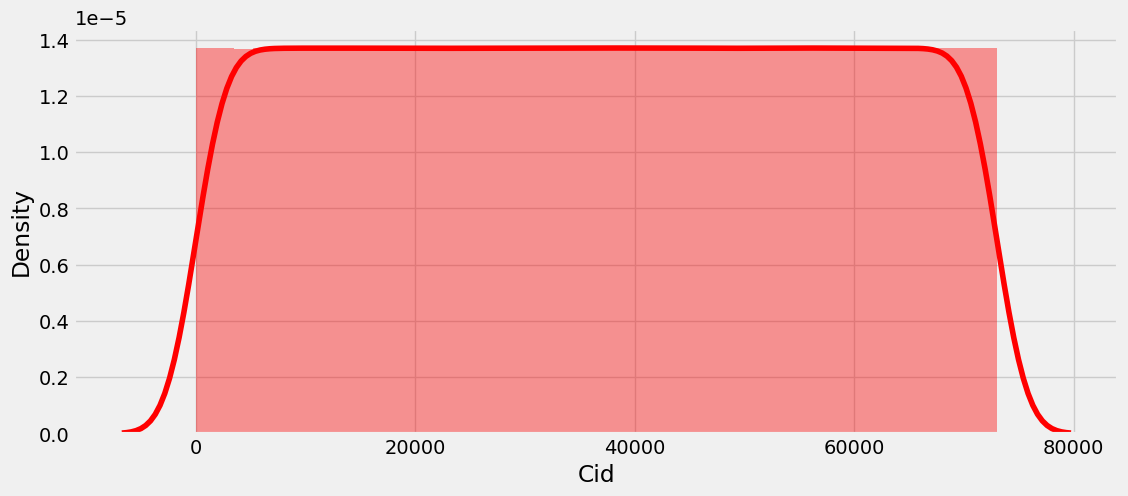

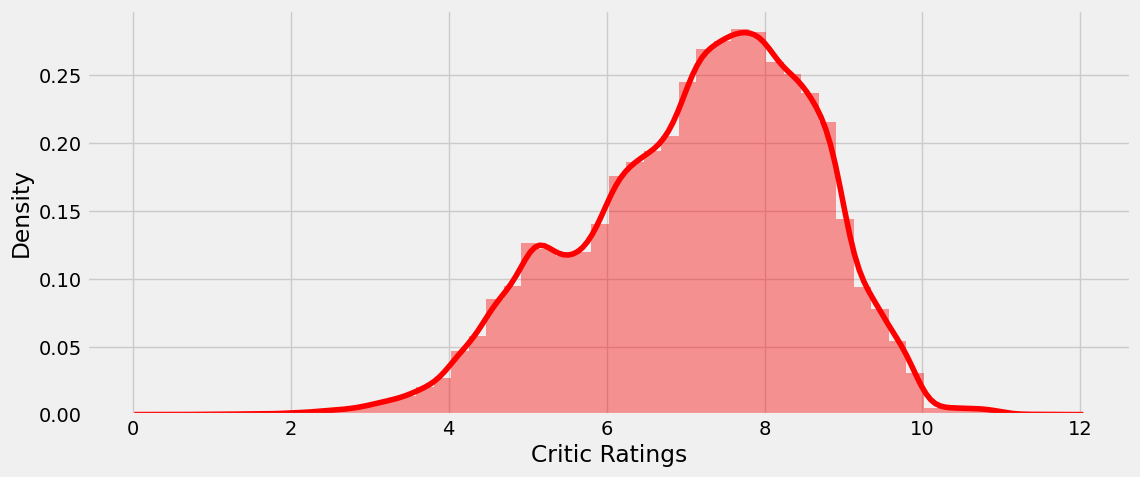

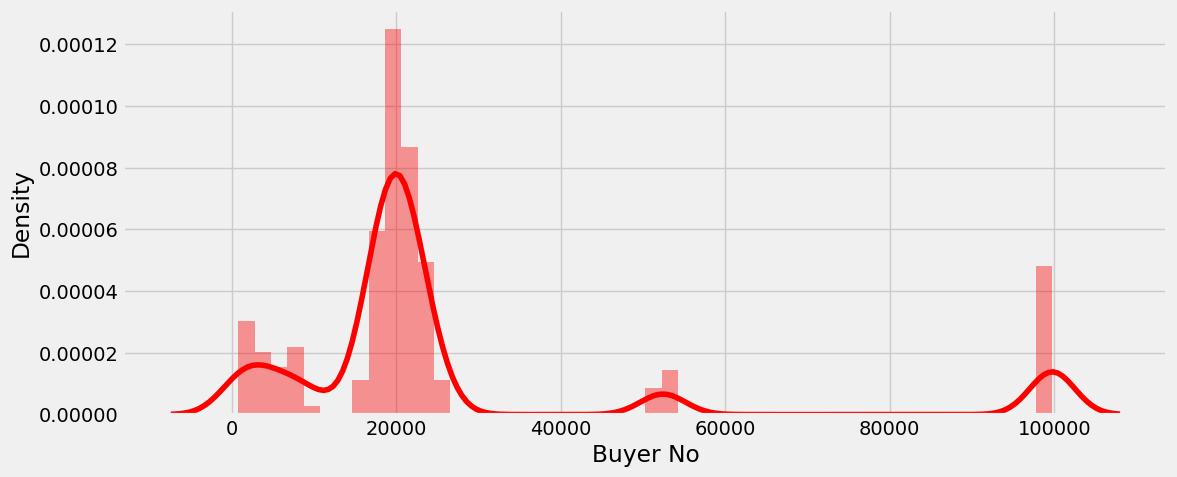

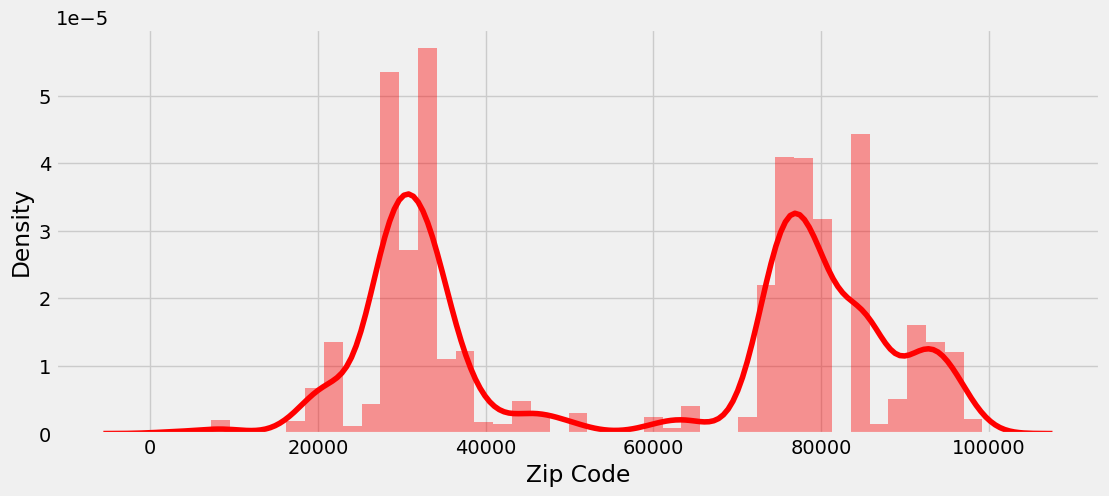

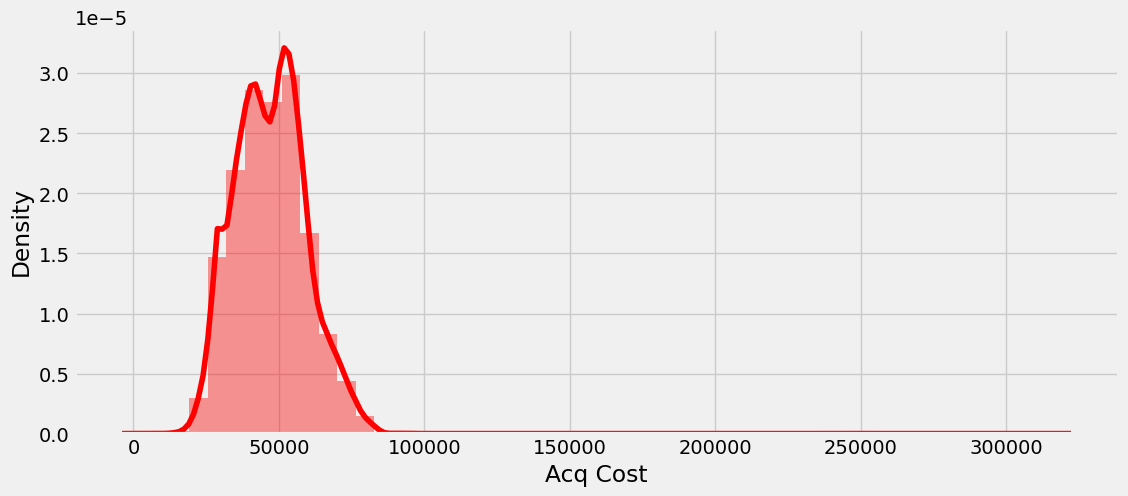

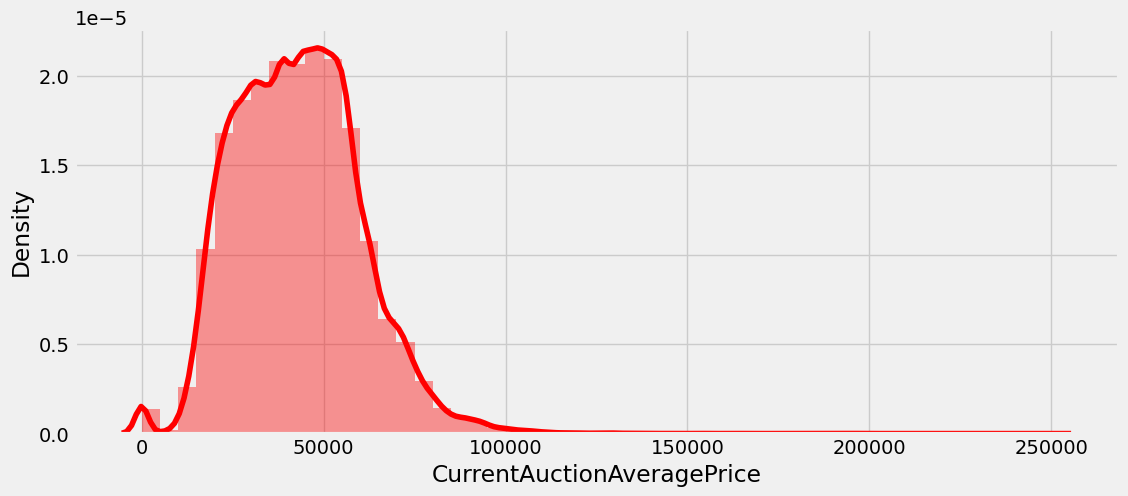

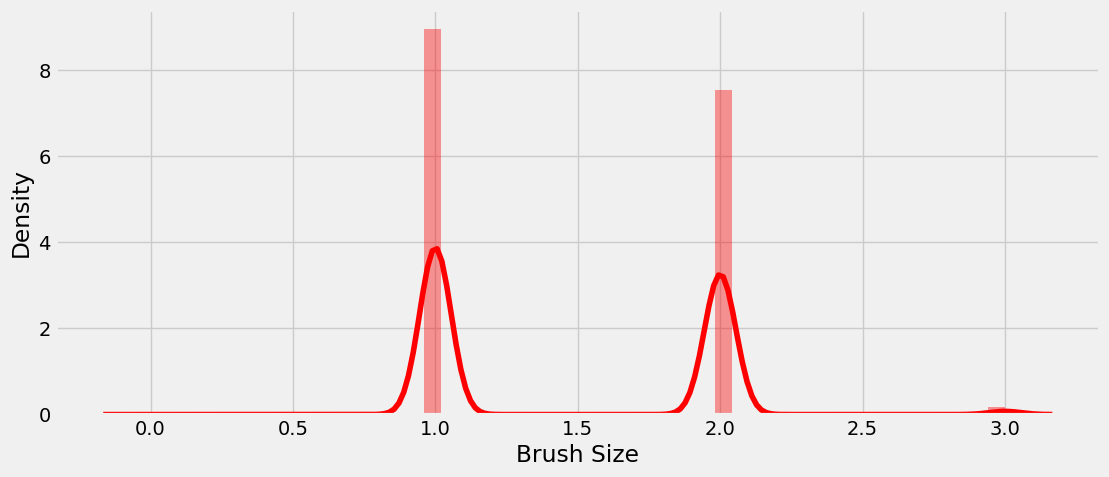

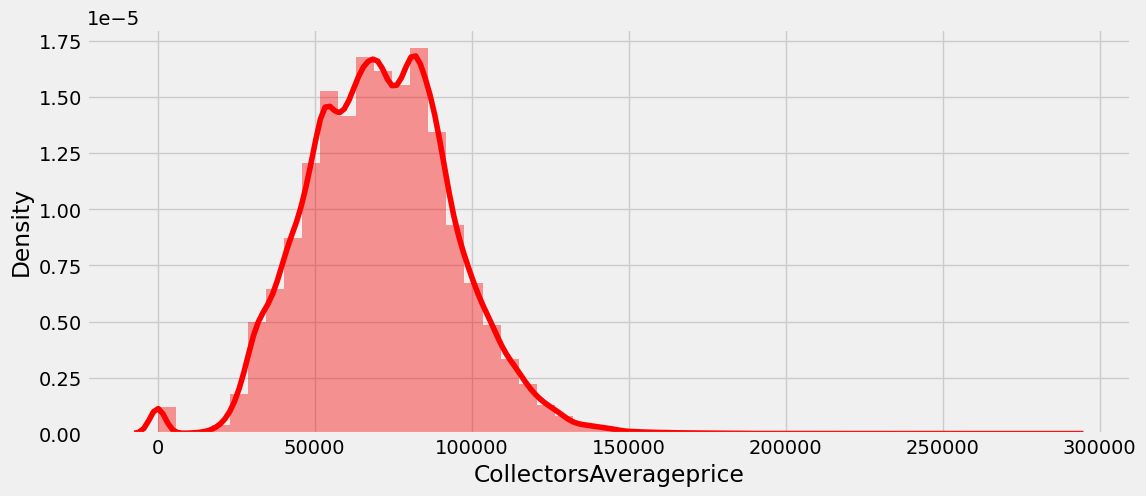

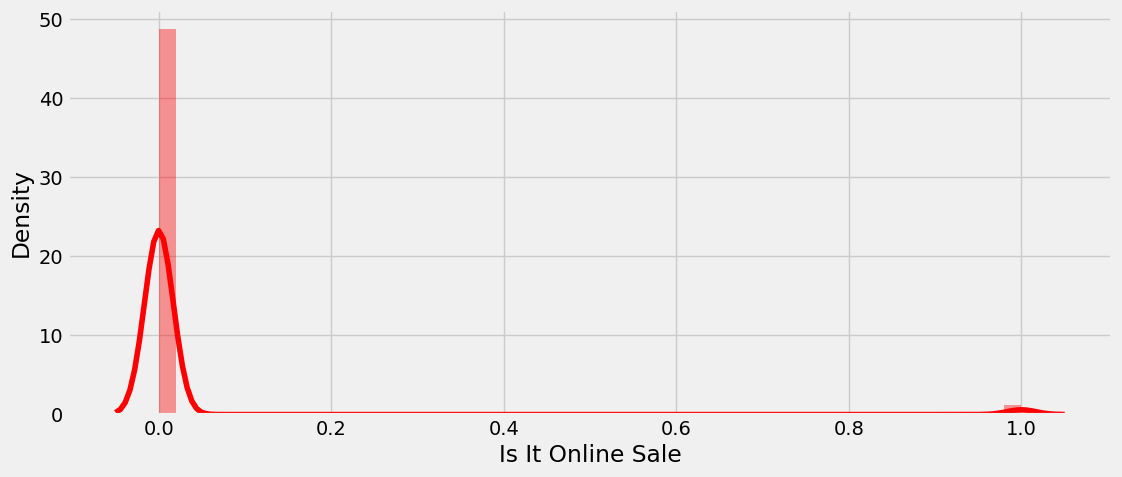

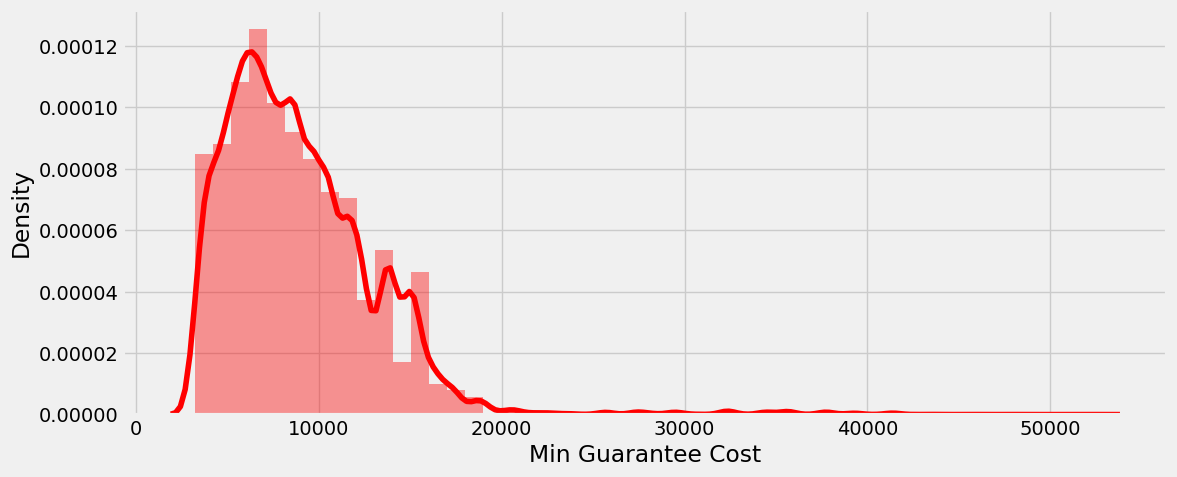

In [34]:
for col in df_num.columns:
  fig = plt.figure(figsize=(12, 5))
  sns.distplot(df_num[col], color = 'red')
  plt.show()

## Insights

- Critic rating = peak at around 7.5
- Min Gurantee Cost = right skewed indicating less no items with very high min gur cost
- Collector avg price = 5.k to 100k multiple peaks
- Current avg price = peak at around 50000

## Box Plot Analysis

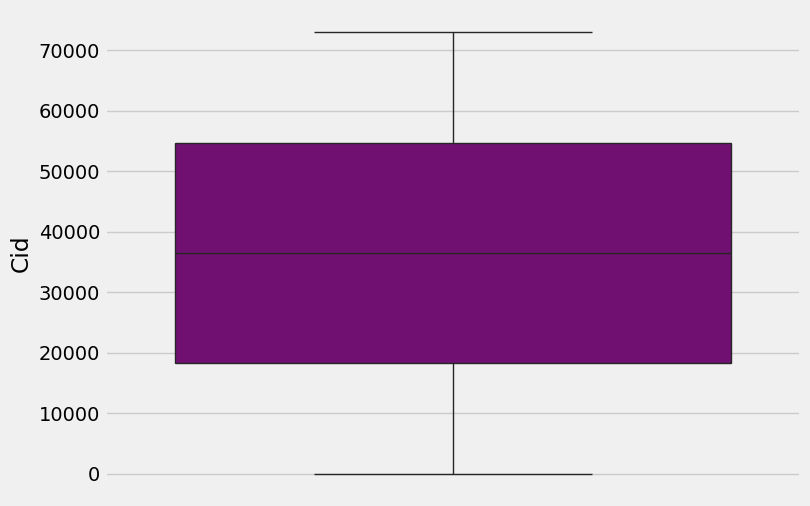

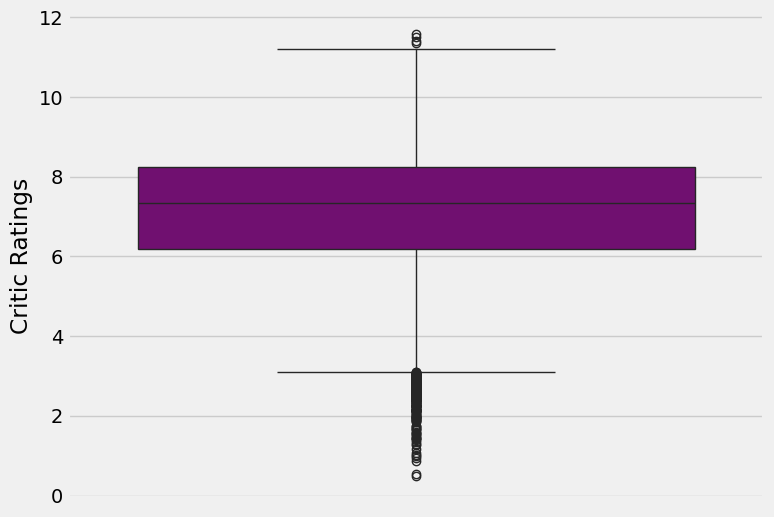

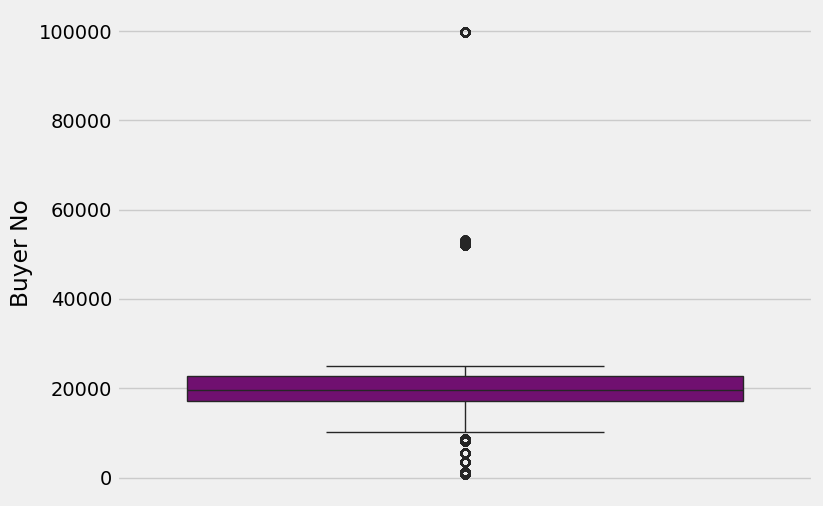

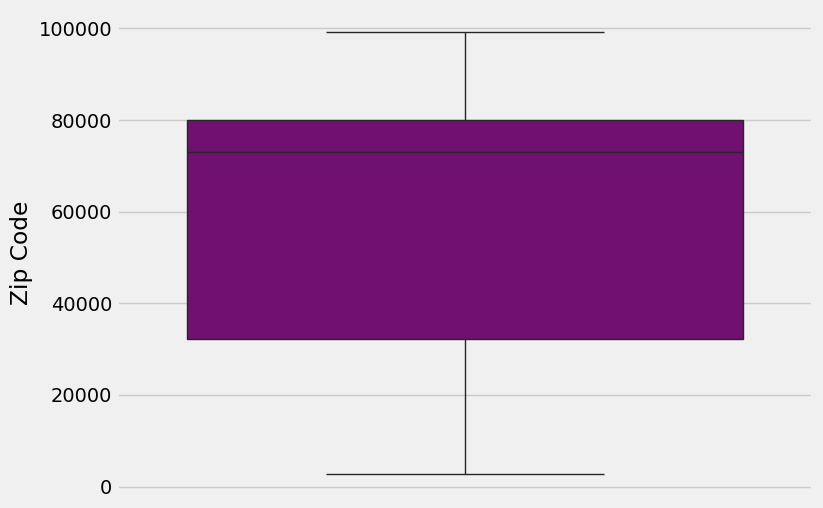

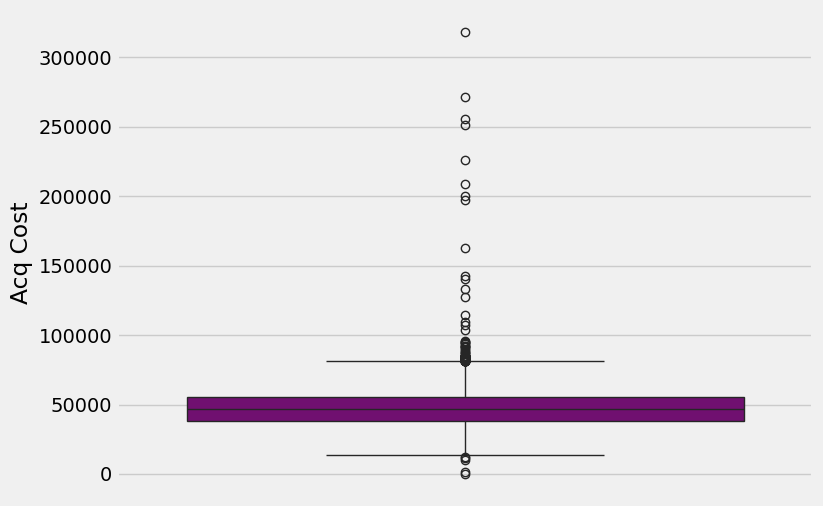

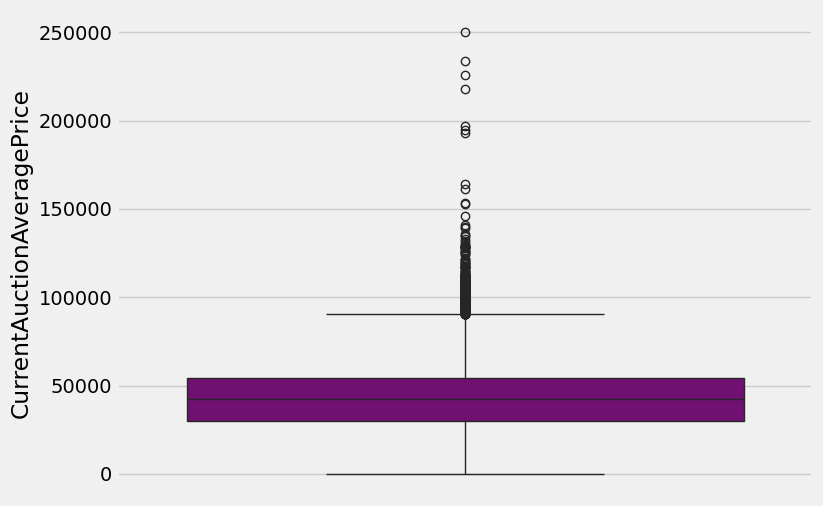

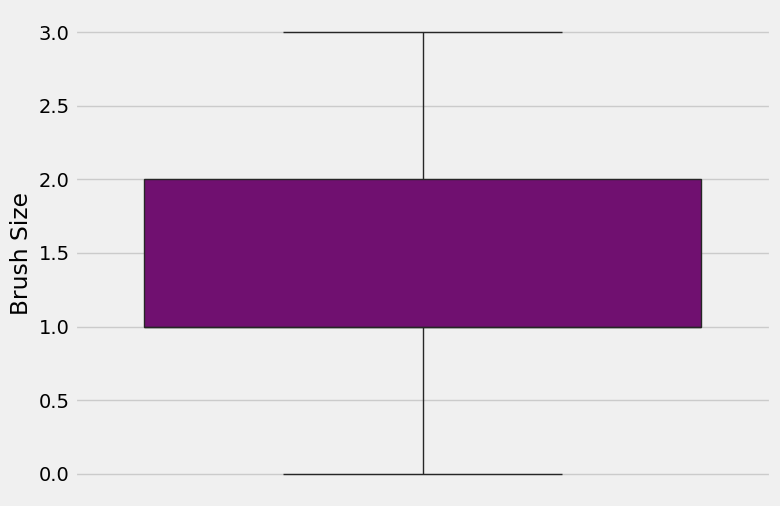

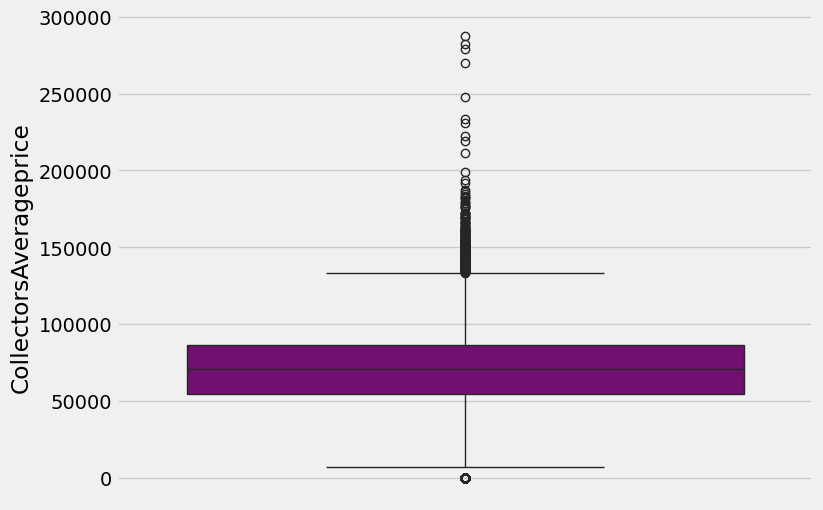

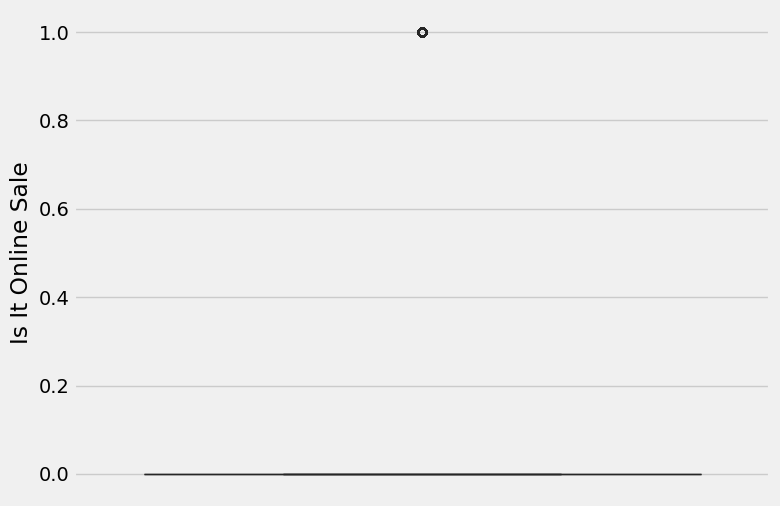

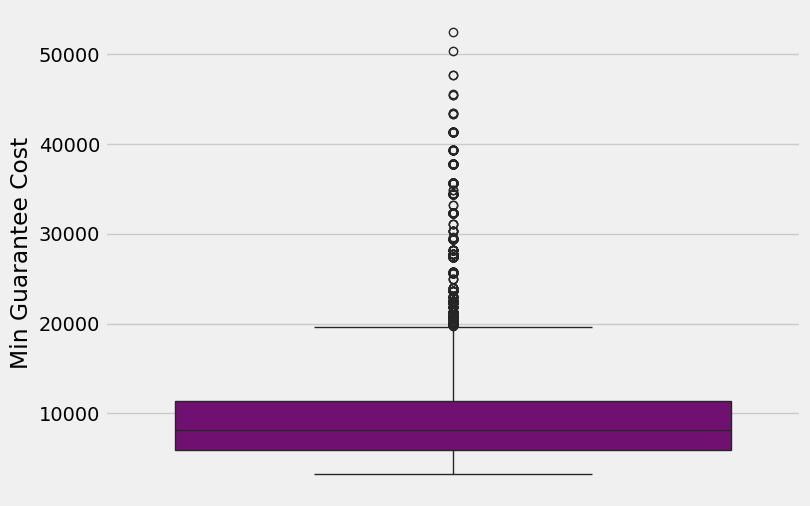

In [35]:
for col in df_num.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(df_num[col], color = 'purple')
  plt.show()

## Insights:

- significant outliers are present All the costs (collector, current avg etc) columns
- from 0-3 rating there is high no of outliers for Criticsrating column

## Categorical values distribution
- To assess which features has very high **cardinality**

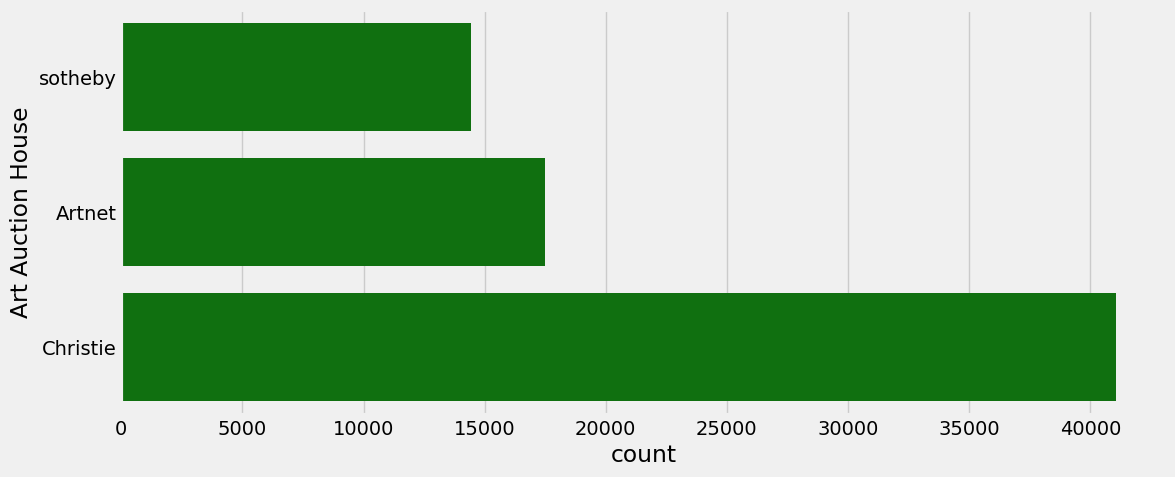

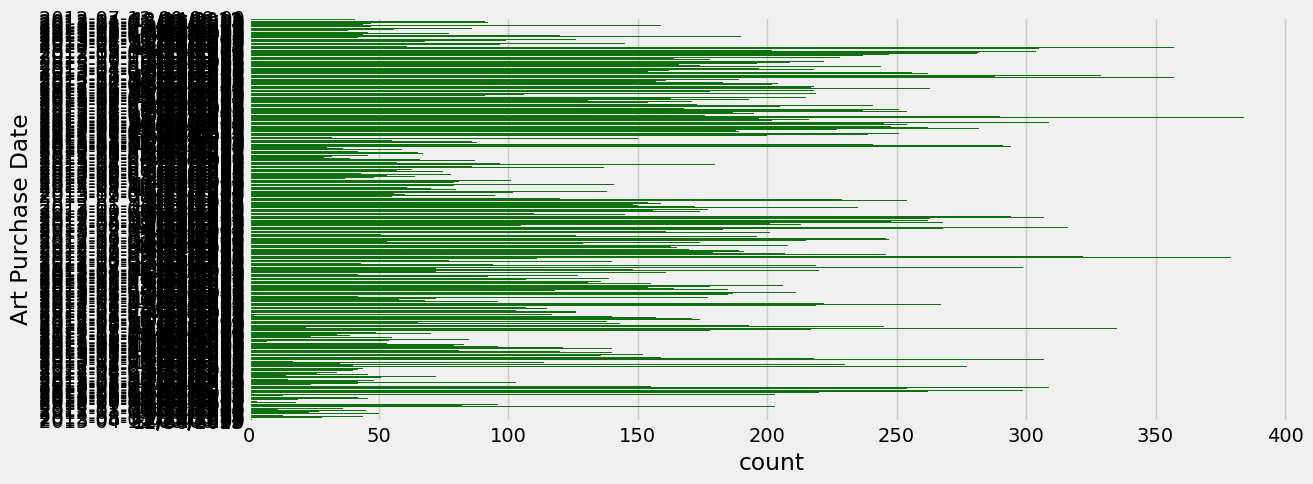

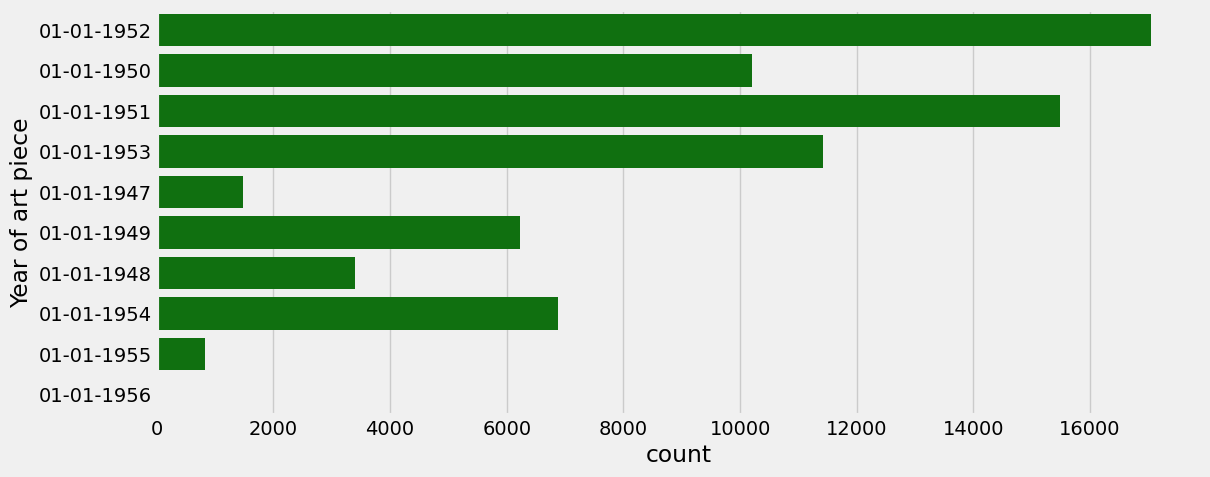

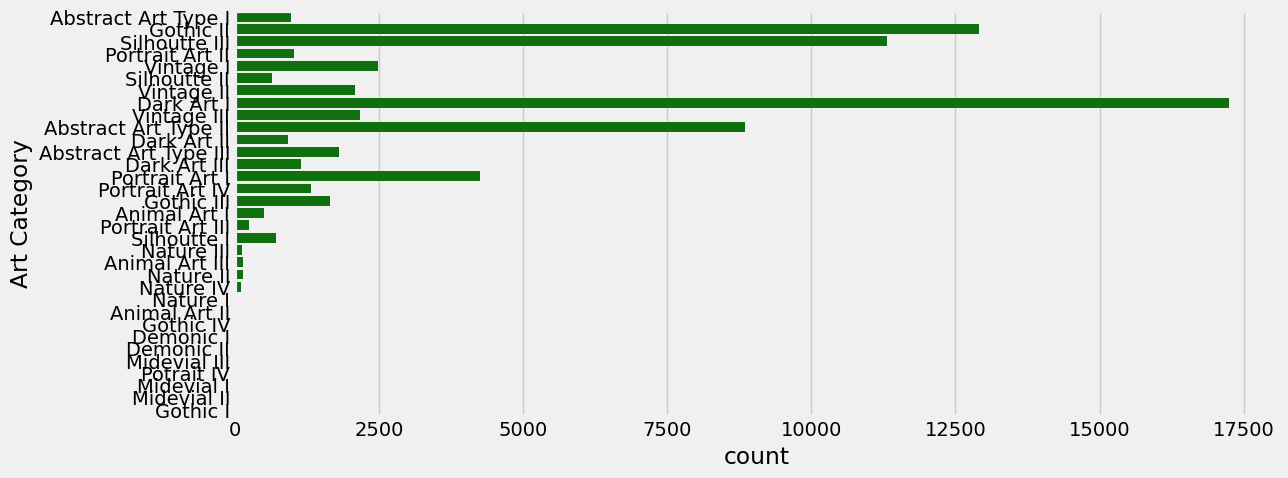

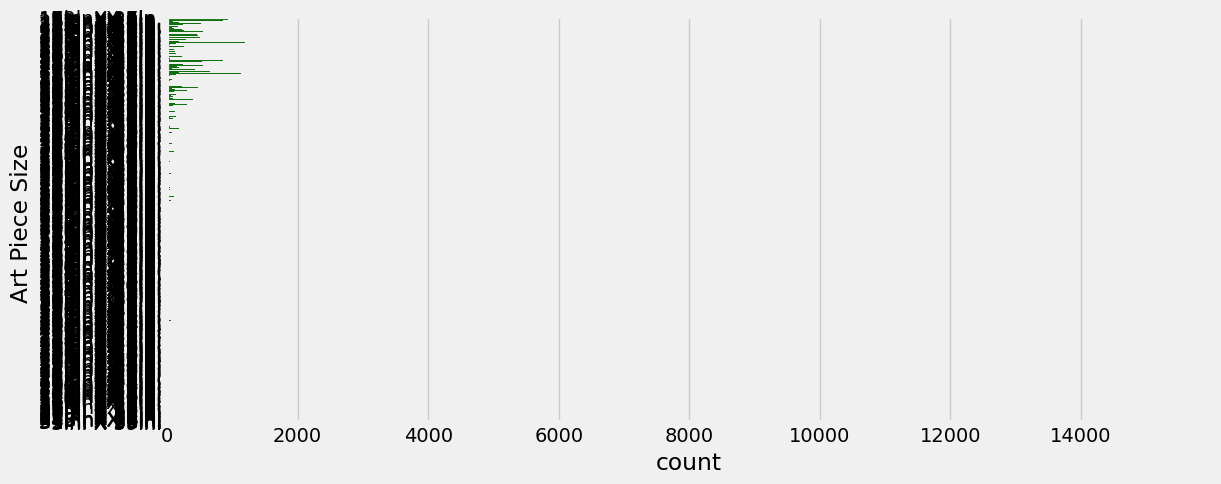

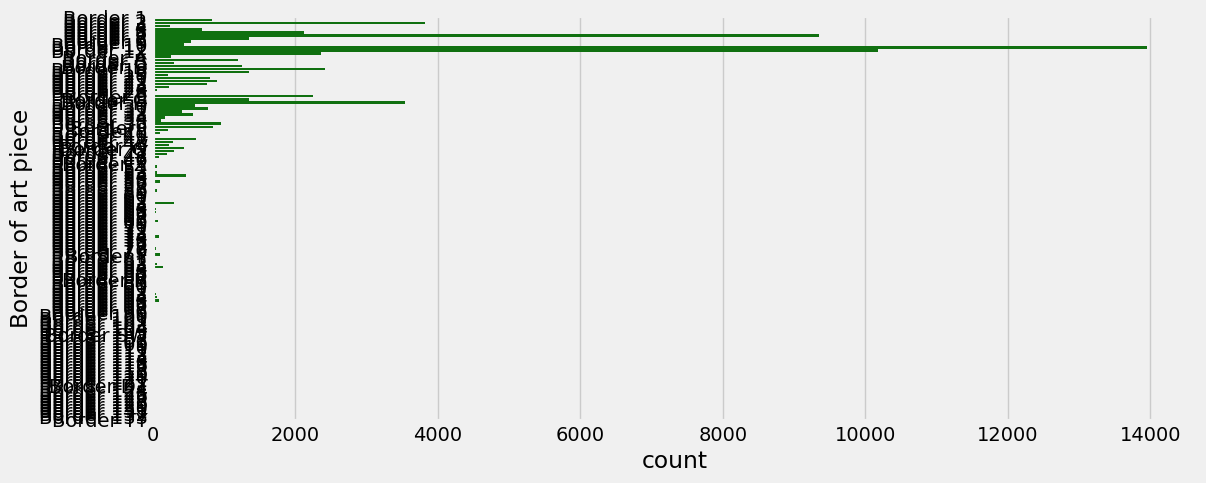

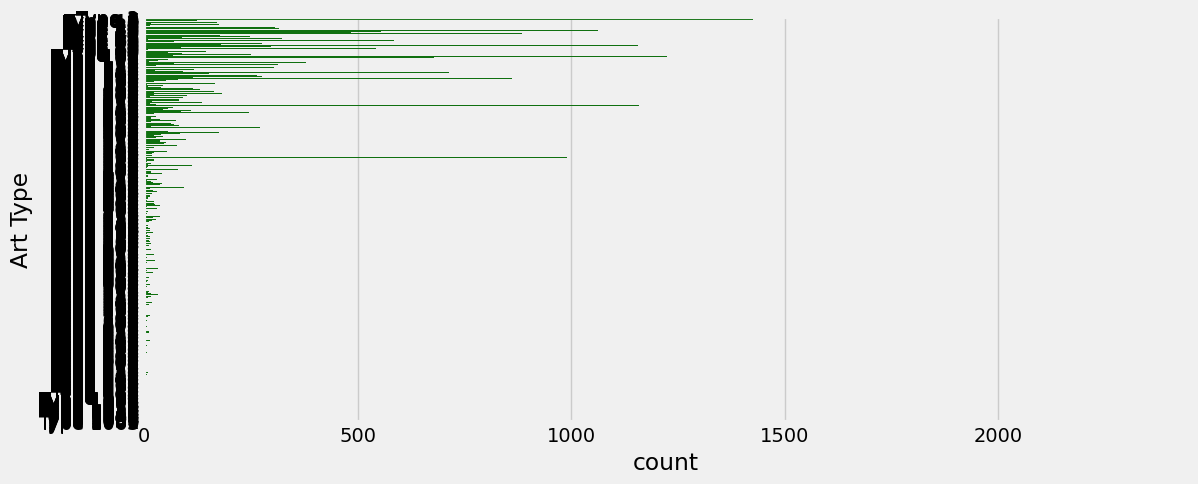

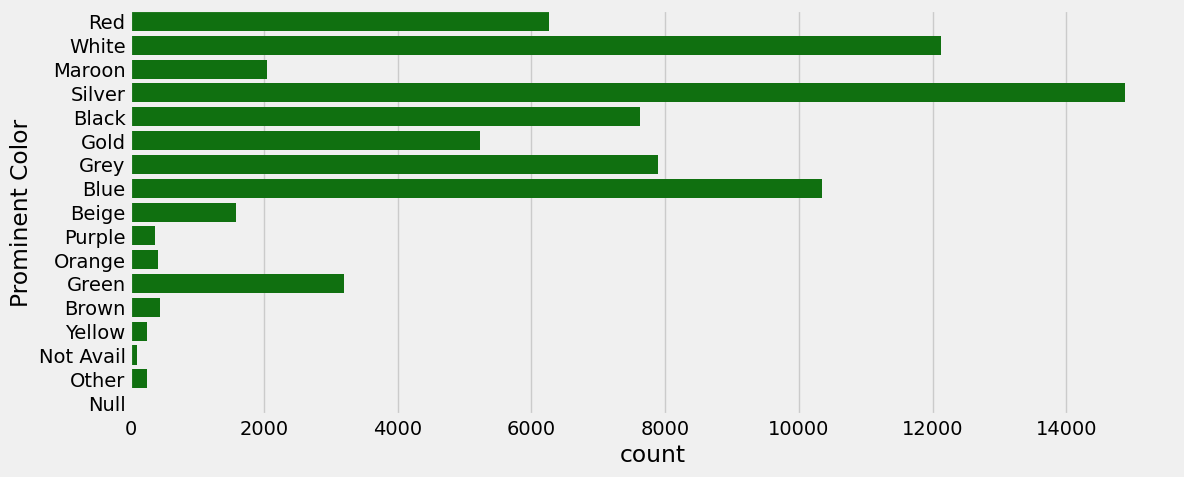

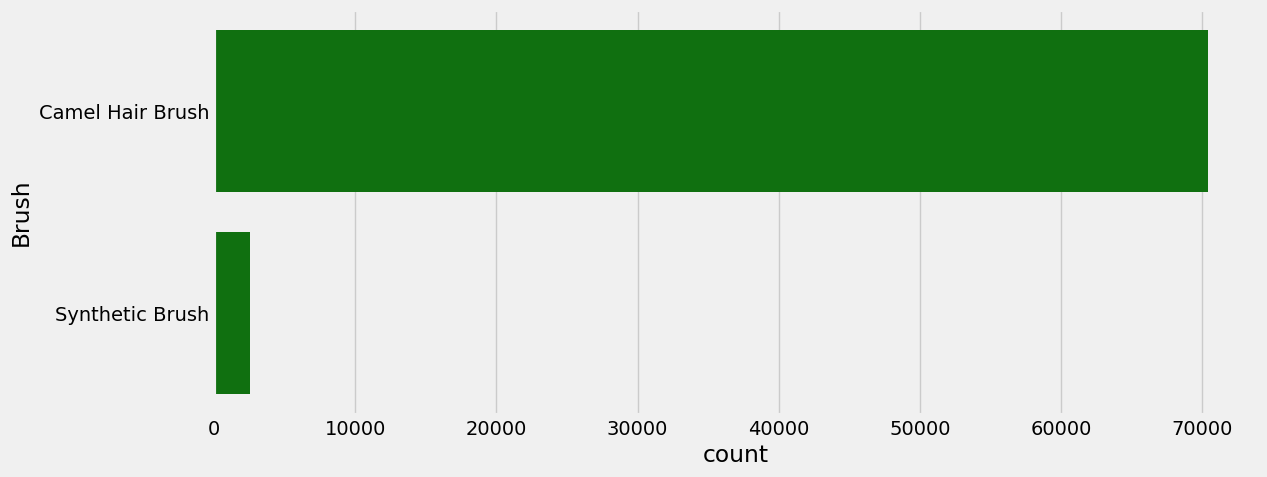

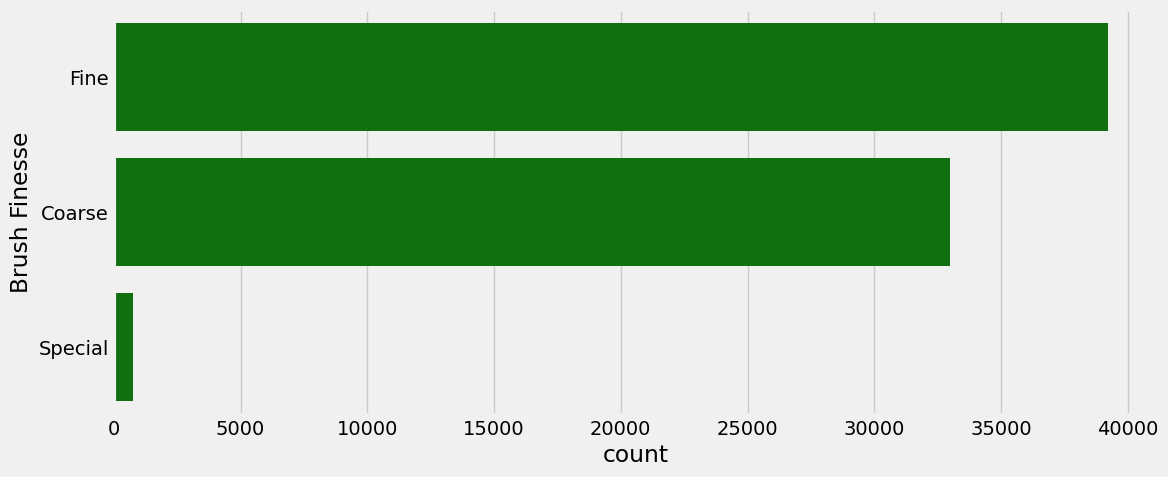

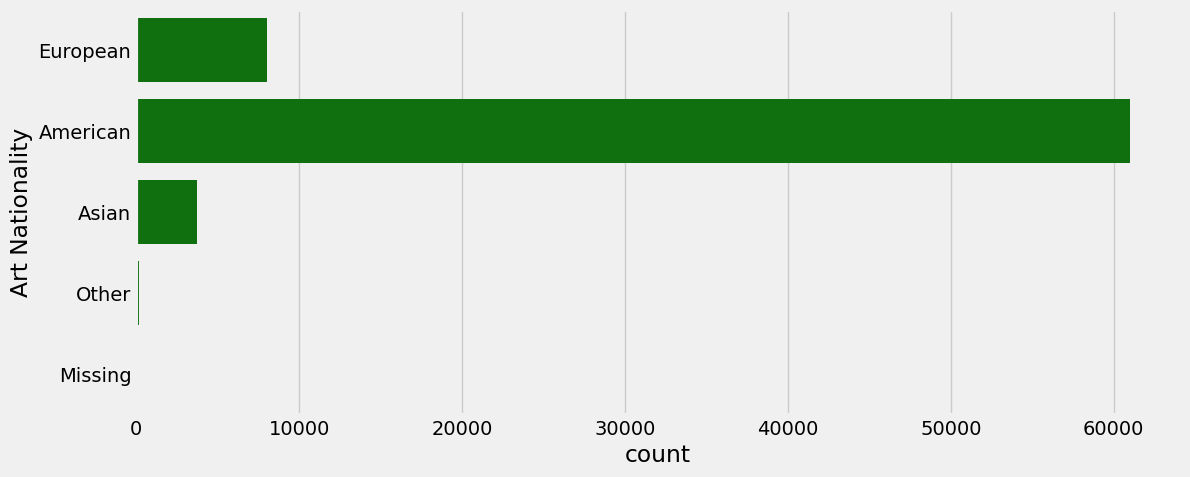

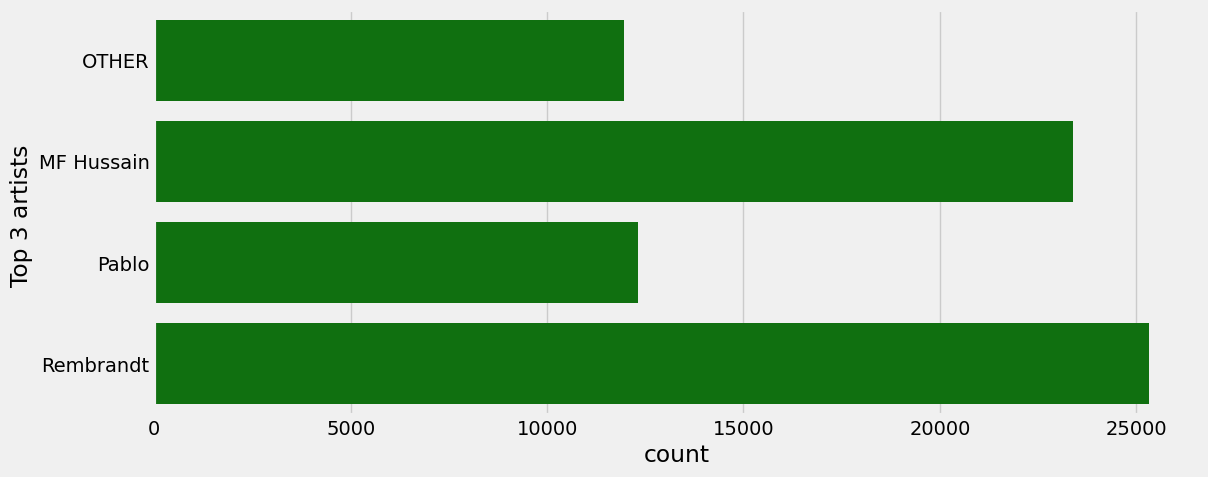

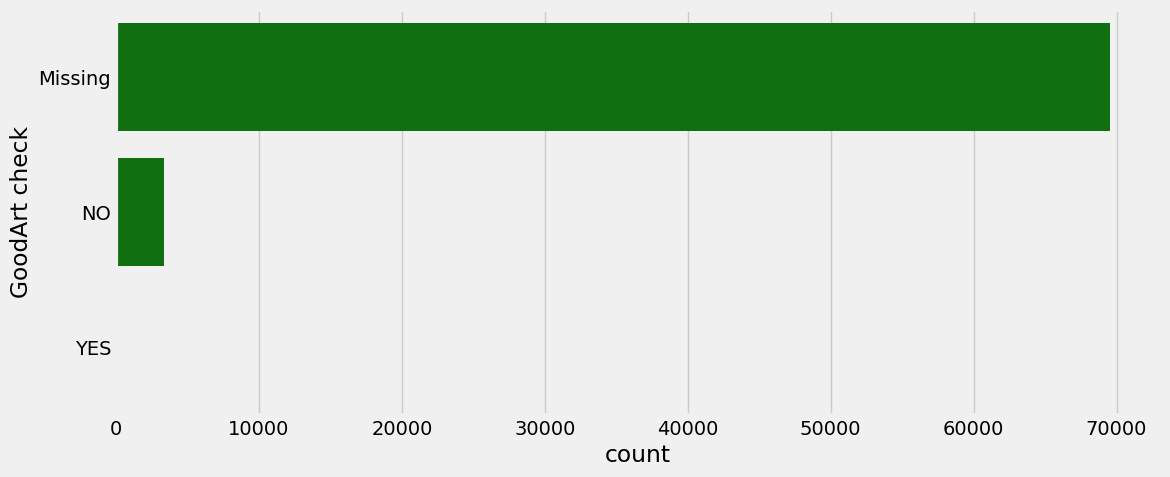

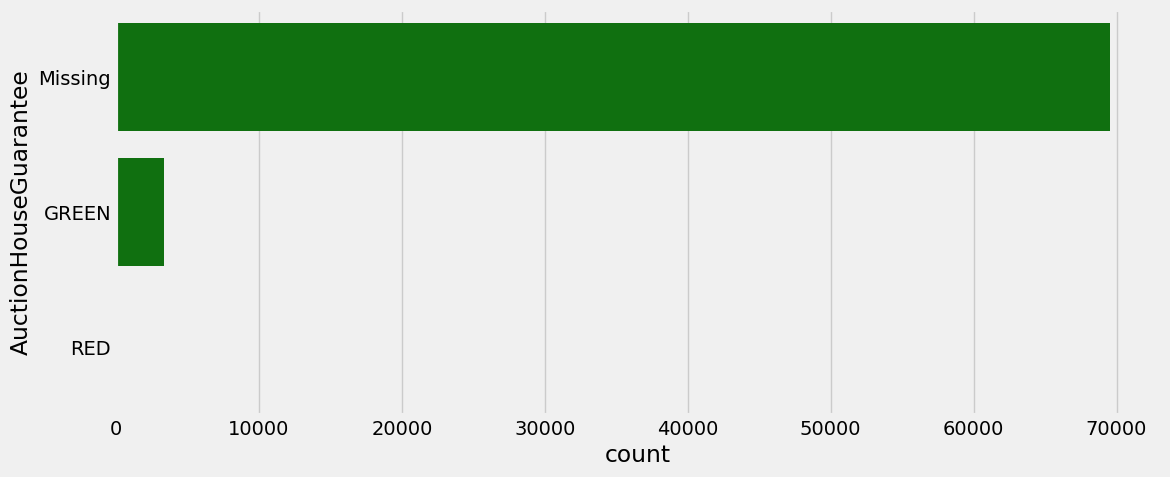

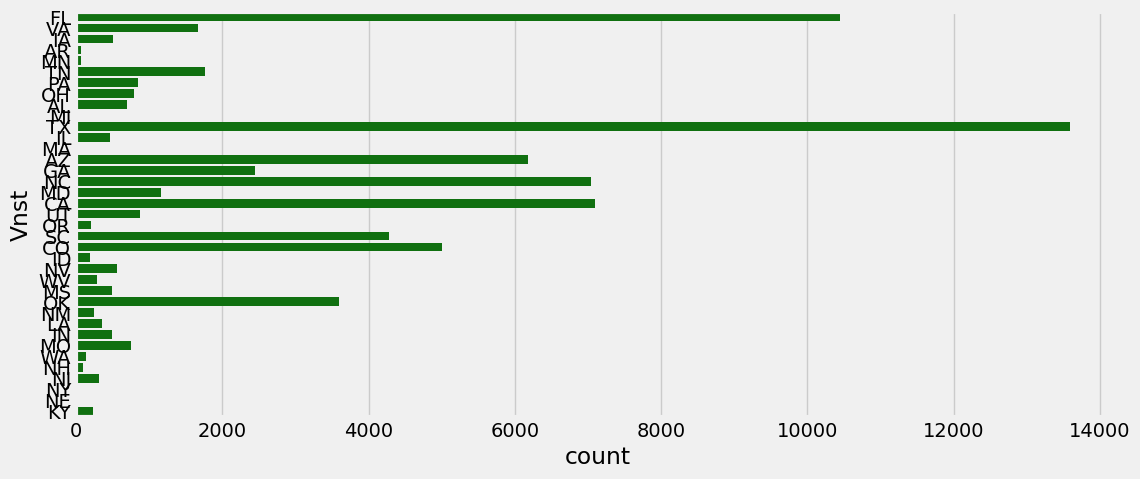

In [36]:
for col in df_cat.columns:
  fig = plt.figure(figsize=(12, 5))
  sns.countplot(df_cat[col], color = 'green')
  plt.show()

- for our analysis we can drop the Object columns which have very high cardinality

In [53]:
  selected_col = ['IsGood Purchase', 'Critic Ratings','Acq Cost', 'CurrentAuctionAveragePrice', 'Brush','Brush Size', 'Brush Finesse', 'Art Nationality', 'Top 3 artists ',
        'CollectorsAverageprice', 'GoodArt check', 'AuctionHouseGuarantee','Is It Online Sale', 'Min Guarantee Cost']

In [54]:
data = df[selected_col]

In [43]:
data.head()

,IsGood Purchase,Critic Ratings,Acq Cost,CurrentAuctionAveragePrice,Brush,Brush Size,Brush Finesse,Art Nationality,Top 3 artists,CollectorsAverageprice,GoodArt check,AuctionHouseGuarantee,Is It Online Sale,Min Guarantee Cost
0,0,8.9046,49700.0,52157.0,Camel Hair Brush,1.0,Fine,European,OTHER,86863.0,Missing,Missing,0,7791
1,0,9.3593,53200.0,52192.0,Camel Hair Brush,1.0,Fine,American,MF Hussain,89537.0,Missing,Missing,0,7371
2,0,7.3807,34300.0,28245.0,Camel Hair Brush,2.0,Coarse,American,MF Hussain,60914.0,Missing,Missing,0,9723
3,0,6.5617,28700.0,12908.0,Camel Hair Brush,1.0,Fine,American,MF Hussain,38626.0,Missing,Missing,0,4410
4,0,6.9367,28000.0,22729.0,Synthetic Brush,2.0,Coarse,American,Pablo,55377.0,Missing,Missing,0,7140


## Descriptive statistics

In [44]:
data.describe()

,Critic Ratings,Acq Cost,CurrentAuctionAveragePrice,Brush Size,CollectorsAverageprice,Is It Online Sale,Min Guarantee Cost
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,7.150000,47116.540283,42924.569012,1.472836,71017.697198,0.025280,8936.066892
std,1.457891,12374.925047,17005.156580,0.519704,23121.720139,0.156975,4191.927517
min,0.482500,7.000000,0.000000,0.000000,0.000000,0.000000,3234.000000
25%,6.183700,38045.000000,29995.000000,1.000000,54572.000000,0.000000,5859.000000
50%,7.336100,46900.000000,42532.000000,1.000000,70798.000000,0.000000,8085.000000
75%,8.243600,55300.000000,54124.000000,2.000000,86156.000000,0.000000,11361.000000
max,11.571700,318283.000000,250054.000000,3.000000,287434.000000,1.000000,52486.000000


In [46]:
cm = data.corr(numeric_only=True)

## Correlation analysis

<Axes: >

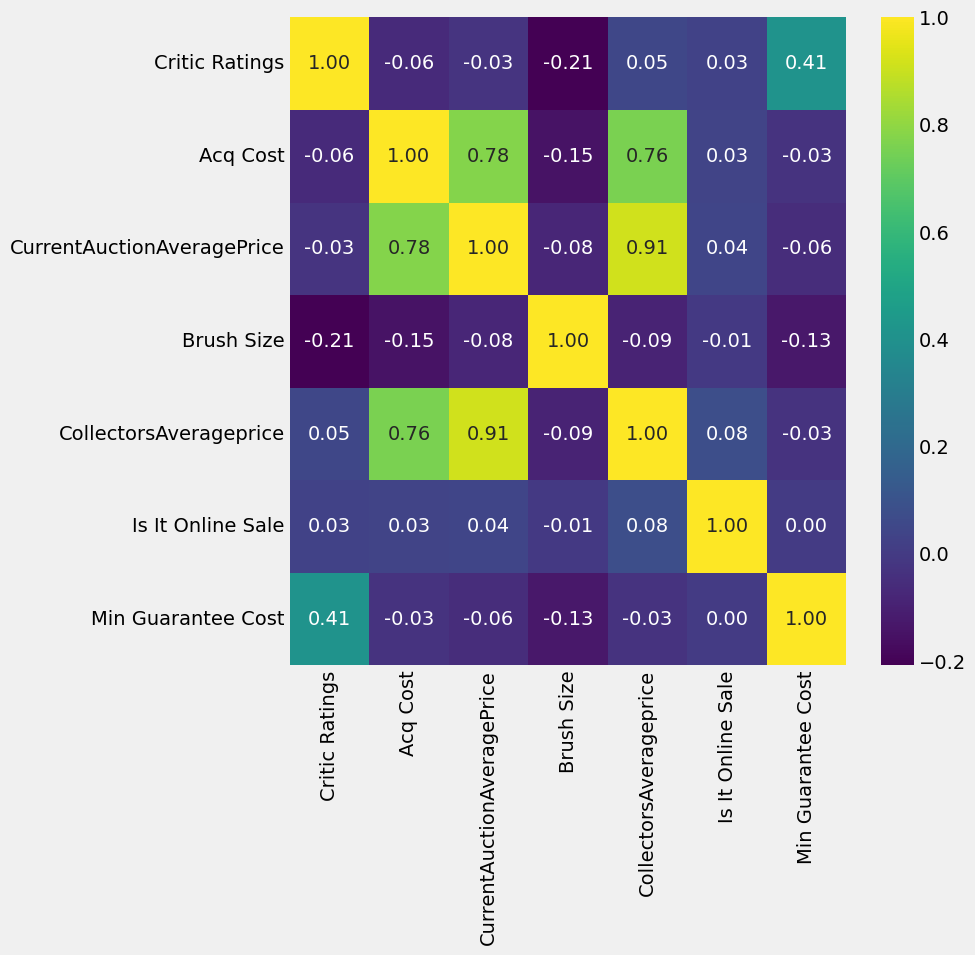

In [50]:
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot=True, cmap='viridis', fmt = '.2f')

Here's a concise summary of the key insights from the correlation matrix:

1. **Key Strong Correlations**:
   - **`Acq Cost`** and **`CurrentAuctionAveragePrice`** are strongly positively correlated (**0.78**), indicating that higher acquisition costs are associated with higher auction prices.
   - **`CurrentAuctionAveragePrice`** and **`CollectorsAverageprice`** are very strongly correlated (**0.91**), suggesting that higher auction prices tend to match the prices collectors are willing to pay.
   
2. **Key Moderate Correlations**:
   - **`Critic Ratings`** and **`Min Guarantee Cost`** have a moderate positive correlation (**0.41**), indicating that higher-rated artworks might have higher guaranteed costs.
   - **`Acq Cost`** and **`CollectorsAverageprice`** also have a strong positive correlation (**0.76**), suggesting that artworks with higher acquisition costs are valued more by collectors.

3. **Weak or No Significant Correlations**:
   - **`Brush Size`** has weak correlations with most variables, indicating it may not be a significant predictor for auction price or collector value.
   - **`Is It Online Sale`** shows very weak correlations with other features, suggesting that whether an artwork is sold online doesn't strongly impact its price or value.
   

## Action
   
   ### Lets say for our analysis the target variable is = CurrentAuctionAveragePrice

   - **Avoid multicollinearity**: Since `Acq Cost`, `CurrentAuctionAveragePrice`, and `CollectorsAverageprice` are highly correlated, consider removing or combining these features.
   - **Focus on Acquisition and Auction Prices**: These are your most influential variables for predicting auction and collector prices.
   - **Consider creating new features**: For example, the ratio of `Acq Cost` to `CurrentAuctionAveragePrice` could provide useful information.


In [55]:
final_col = ['IsGood Purchase', 'Critic Ratings','Acq Cost', 'CurrentAuctionAveragePrice',
                'Brush','Brush Size', 'Brush Finesse', 'Art Nationality', 'Top 3 artists ',
                'GoodArt check', 'AuctionHouseGuarantee','Is It Online Sale', 'Min Guarantee Cost']


In [58]:
auction = df[final_col]

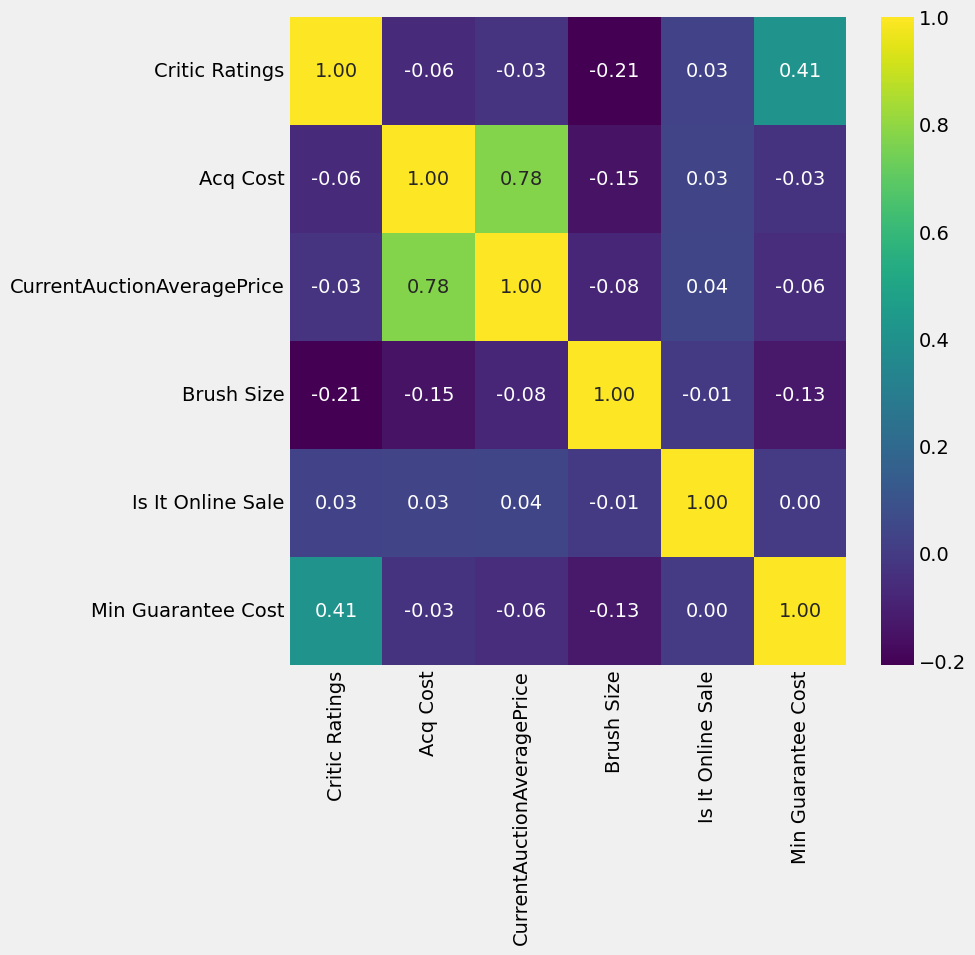

In [59]:
plt.figure(figsize = (8,8))
sns.heatmap(auction.corr(numeric_only=True), annot=True, cmap='viridis', fmt = '.2f')
plt.show()

In [80]:
auction.corr(numeric_only=True)

,Critic Ratings,Acq Cost,CurrentAuctionAveragePrice,Brush Size,Is It Online Sale,Min Guarantee Cost
Critic Ratings,1.000000,-0.062008,-0.028484,-0.207948,0.029556,0.411718
Acq Cost,-0.062008,1.000000,0.777110,-0.148284,0.034120,-0.033210
CurrentAuctionAveragePrice,-0.028484,0.777110,1.000000,-0.077656,0.039863,-0.056713
Brush Size,-0.207948,-0.148284,-0.077656,1.000000,-0.009470,-0.128585
Is It Online Sale,0.029556,0.034120,0.039863,-0.009470,1.000000,0.003837
Min Guarantee Cost,0.411718,-0.033210,-0.056713,-0.128585,0.003837,1.000000


## Correlation Analysis

1. **Acquisition Cost (Acq Cost) and Current Auction Average Price**:
   - **Correlation (0.777)**: A strong positive correlation indicates that art pieces with higher acquisition costs tend to have higher auction prices. This reinforces the insight that acquisition cost is one of the most significant predictors for high-value bids.

2. **Collectors’ Average Price and Current Auction Average Price**:
   - **Correlation (0.912)** (from earlier analysis): Although not included in this matrix, the previous analysis highlighted Collectors’ Average Price as having the highest correlation with Current Auction Average Price, underscoring its importance.

3. **Critic Ratings and Minimum Guarantee Cost**:
   - **Correlation (0.412)**: This moderate positive correlation suggests that a higher Critic Rating may be associated with a higher Minimum Guarantee Cost, indicating that more critically acclaimed pieces tend to have minimum guarantees, likely due to increased confidence in their auction value.

4. **Brush Size and Current Auction Average Price**:
   - **Correlation (-0.078)**: A slight negative correlation, suggesting that Brush Size does not significantly impact auction price. Larger or smaller brush sizes in art pieces appear to have minimal influence on bid values.

5. **Critic Ratings and Is It Online Sale**:
   - **Correlation (0.030)**: A very weak positive correlation, suggesting no meaningful relationship between whether the sale is online and Critic Ratings. This implies that online or offline sales are not dependent on the critical acclaim of an art piece.

6. **Min Guarantee Cost and Current Auction Average Price**:
   - **Correlation (-0.057)**: Slightly negative, suggesting a minimal inverse relationship between the minimum guarantee cost and the auction price. While Min Guarantee Cost does influence auction outcomes, its direct impact on Current Auction Average Price appears to be limited.

### Key Takeaways :
   - **Prioritize Acquisition Cost and Collectors’ Average Price** in predictive strategies, as these have the most substantial impact on auction prices.
   - **Consider using Critic Ratings and Minimum Guarantee Cost** to support bidder engagement strategies, especially for pieces with high critical acclaim or set guarantees.
   - **Brush Size and Online Sale Status** show negligible influence, so these variables may not require strategic emphasis in high-value bid contexts.

This analysis helps clarify the priority factors for predicting auction outcomes and guides data-backed decisions on auction practices. Let me know if further exploration is needed!

In [63]:
#dataframe for predictive modeling
auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   IsGood Purchase             72983 non-null  category
 1   Critic Ratings              72983 non-null  float64 
 2   Acq Cost                    72983 non-null  float64 
 3   CurrentAuctionAveragePrice  72983 non-null  float64 
 4   Brush                       72983 non-null  object  
 5   Brush Size                  72983 non-null  float64 
 6   Brush Finesse               72983 non-null  object  
 7   Art Nationality             72983 non-null  object  
 8   Top 3 artists               72978 non-null  object  
 9   GoodArt check               72983 non-null  object  
 10  AuctionHouseGuarantee       72983 non-null  object  
 11  Is It Online Sale           72983 non-null  int64   
 12  Min Guarantee Cost          72983 non-null  int64   
dtypes: category(1), 

## Predictive Analysis  : Refression Model Building
- Predicting Current Auction avg price to analyse which factors(e.g Critic rating, acq cost, online sale or not, min gurantee cost etc) are crucial to drive the price high or low
- Algorithm used = **RandomForest Regressor**

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score,r2_score

# feature and target segregation
X = data[selected_col].drop(['CurrentAuctionAveragePrice'], axis=1)
y = data['CurrentAuctionAveragePrice']


In [83]:
#converting categorical columns into numerical
X_dummies = pd.get_dummies(X, drop_first=True, dtype=int)
X_dummies.head()

,Critic Ratings,Acq Cost,Brush Size,CollectorsAverageprice,Is It Online Sale,Min Guarantee Cost,IsGood Purchase_1,Brush_Synthetic Brush,Brush Finesse_Fine,Brush Finesse_Special,...,Art Nationality_European,Art Nationality_Missing,Art Nationality_Other,Top 3 artists _OTHER,Top 3 artists _Pablo,Top 3 artists _Rembrandt,GoodArt check_NO,GoodArt check_YES,AuctionHouseGuarantee_Missing,AuctionHouseGuarantee_RED
0,8.9046,49700.0,1.0,86863.0,0,7791,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,9.3593,53200.0,1.0,89537.0,0,7371,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,7.3807,34300.0,2.0,60914.0,0,9723,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6.5617,28700.0,1.0,38626.0,0,4410,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,6.9367,28000.0,2.0,55377.0,0,7140,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [84]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=42)

In [86]:
# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [87]:
# Predict the target on the test set
y_pred = model.predict(X_test)

In [88]:
# Calculate MSE, RMSE, and R² score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [89]:
# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 29929211.077244725
Root Mean Squared Error (RMSE): 5470.759643527096
R² Score: 0.8969194863136534


In [90]:
# Get feature importance
feature_importance = model.feature_importances_

In [91]:
# Create a DataFrame to hold features and their corresponding importance values
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

In [92]:
# Sort the feature importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                          Feature    Importance
3          CollectorsAverageprice  8.641440e-01
1                        Acq Cost  6.180883e-02
0                  Critic Ratings  2.895405e-02
5              Min Guarantee Cost  2.516080e-02
16       Top 3 artists _Rembrandt  3.935354e-03
15           Top 3 artists _Pablo  3.088266e-03
2                      Brush Size  2.189291e-03
8              Brush Finesse_Fine  1.991911e-03
6               IsGood Purchase_1  1.907625e-03
14           Top 3 artists _OTHER  1.822955e-03
11       Art Nationality_European  9.141000e-04
19  AuctionHouseGuarantee_Missing  8.906343e-04
17               GoodArt check_NO  8.427491e-04
10          Art Nationality_Asian  8.061136e-04
7           Brush_Synthetic Brush  6.725381e-04
4               Is It Online Sale  5.623563e-04
9           Brush Finesse_Special  2.059826e-04
13          Art Nationality_Other  7.800413e-05
18              GoodArt check_YES  1.916106e-05
20      AuctionHous

## 1. Residual Plot

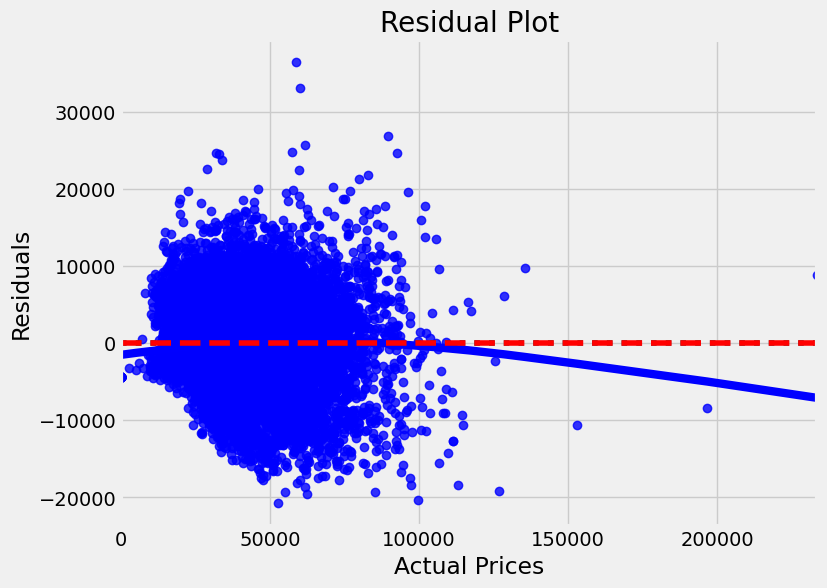

In [93]:
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='red', linestyle='--')
plt.show()

 - The Model errors are randomly distributed along 0 , maintaining **homoscedasticity**

## 2. Predicted vs. Actual Values Plot


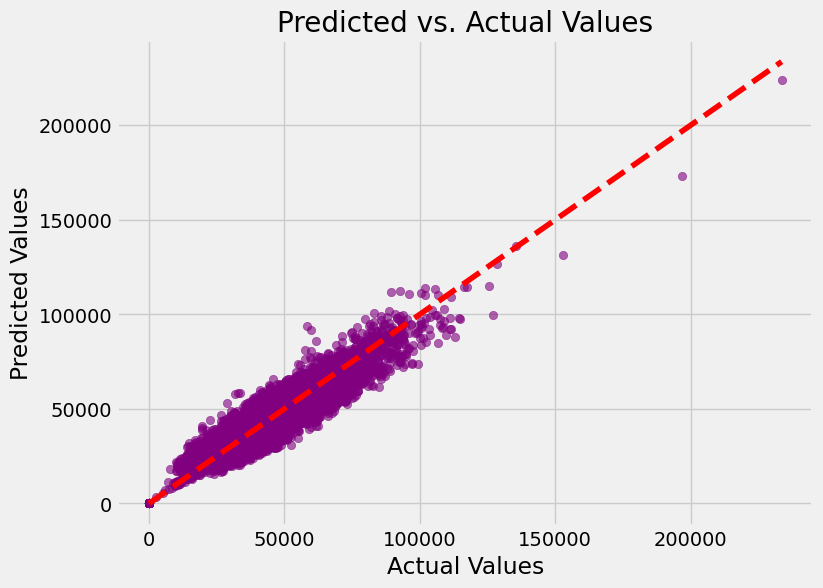

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

- The actual and predicted values lies close to a diagonal line suggesting the model predictions aligns well with actual values

## 3. Feature Importance Bar Plot
- Purpose: To visualize which features contribute the most to the model predictions.
- The most important features (those with higher importance scores) can be emphasized in recommendations to management for focusing auction practices.

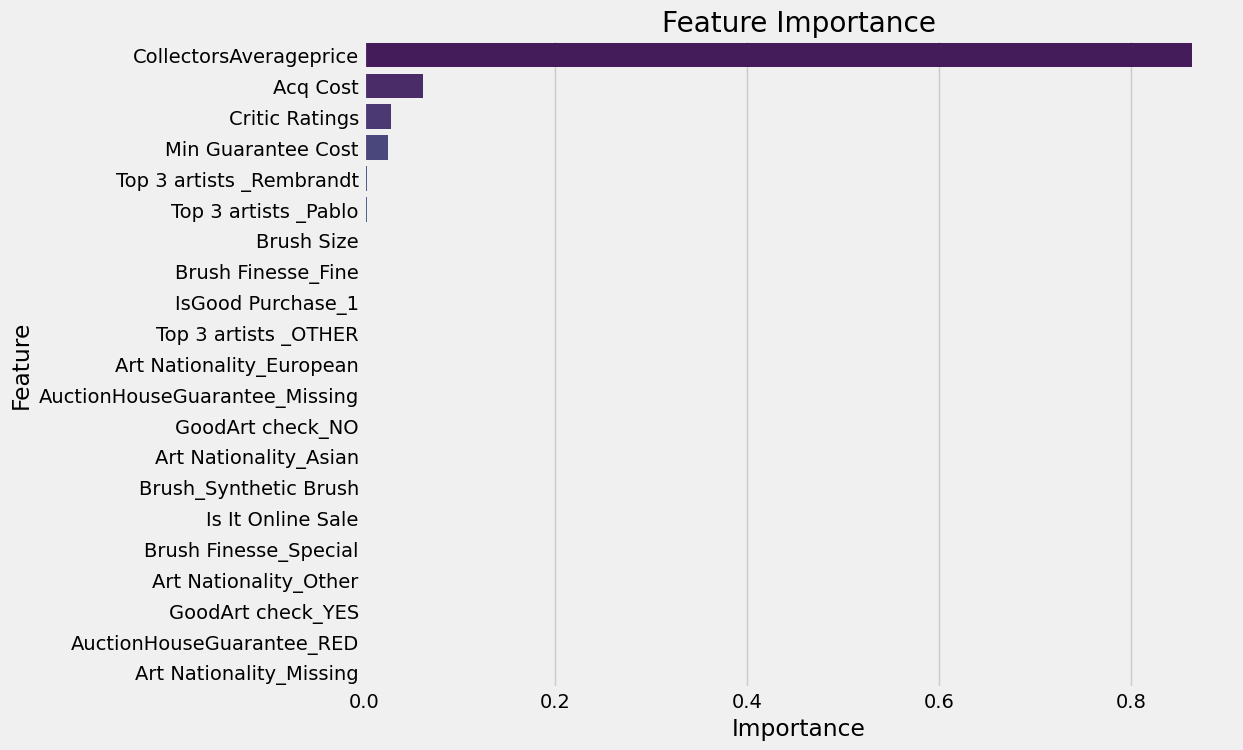

In [95]:
import pandas as pd

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.show()


# **Report Summary for Senior Management**

1. **Predictive Model Performance:**
   - **Root Mean Squared Error (RMSE)**: 5,470.76
   - **R² Score**: 0.897
     - These metrics indicate that our model has a high degree of accuracy (R² ~ 90%) in predicting **Current Auction Average Price** based on the selected features.

2. **Key Factors Impacting High-Value Bids:**
   - **Collectors’ Average Price**: The strongest predictor of auction price, indicating that pieces previously purchased by collectors at higher values are likely to attract high bids.
   - **Acquisition Cost**: Significant influence on the auction price, suggesting that art pieces with a higher acquisition cost tend to attract more valuable bids.
   - **Critic Ratings**: Another influential factor; pieces with higher critic ratings tend to receive higher bids, highlighting the importance of quality and reputation.
   - **Minimum Guarantee Cost**: Moderately impacts the auction outcome, suggesting that a set minimum can help maintain bid values.

3. **Strategic Auction Practices**:
   - **Collector-Targeted Marketing**: Leverage collectors' past purchasing insights to target specific high-value bidders.
   - **Promotion of Critically Acclaimed Art**: Highlight pieces with high critic ratings to attract more serious bidders.
   - **Minimum Guarantee Strategy**: Implement or communicate minimum guarantee pricing, as this can positively impact perceived value.
   - **Transparency in Acquisition Cost**: Disclose acquisition costs where applicable to emphasize the initial value and quality, as this has shown to correlate positively with auction prices.